In [1]:
#iimport relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time


In [8]:
warnings.filterwarnings('ignore')
%matplotlib inline

## for predicting
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## for reducing dimension
from sklearn.decomposition import PCA, FastICA, FactorAnalysis, SparsePCA
#import lightgbm as lgb
import xgboost as xgb

In [4]:
## for evaluations
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [11]:
#read data after feature engineering
data = pd.read_csv('data_tree.csv')
# 训练集和测试集放在一起，需要拆分
Train_data = data.loc[data.train == 1]
Test_data = data.loc[data.train == 0]

In [12]:
X_data = Train_data.drop(['price', 'train'], axis=1)
Y_data = Train_data['price']

X_test = Test_data.drop(['price', 'train'], axis=1)

print(('X train shape:', X_data.shape))
print(('X test shape:', X_test.shape))


('X train shape:', (149037, 37))
('X test shape:', (50000, 37))


In [14]:
#for statistics

def Statistics_inf(data):
    print('_min', np.min(data))
    print('_max:', np.max(data))
    print('_mean', np.mean(data))
    print('_ptp', np.ptp(data))
    print('_std', np.std(data))
    print('_var', np.var(data))
print('Statistics of label:')
Statistics_inf(Y_data)

Statistics of label:
_min 11.0
_max: 99999.0
_mean 5759.707327710568
_ptp 99988.0
_std 6998.847805967881
_var 48983870.61110142


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0faa4358>]],
      dtype=object)

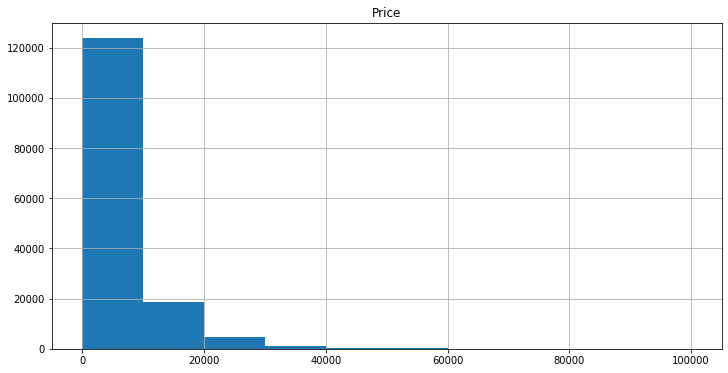

In [15]:
#see tag distributions
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices1 = pd.DataFrame({"Price": Y_data})
prices1.hist()

In [23]:
#fillna
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [18]:
#use RF as model
forest = RandomForestRegressor(criterion='mse',
                               n_estimators=100,
                               max_depth=20,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               random_state=10,
                               n_jobs=-1)
# Split data with validation, 
# Test data set is 50000, split train data set 33% to validation data set
x_train, x_val, y_train, y_val = train_test_split(X_data,
                                                  Y_data,
                                                  test_size=0.33)


In [29]:
#print(x_train.isnull())

In [30]:
print('Training rf...')
forest.fit(x_train, y_train)
val_rf = forest.predict(x_val)
MAE_rf = mean_absolute_error(y_val, val_rf)
print('MAE of val with rf:', (MAE_rf))


Training rf...


ValueError: could not convert string to float: '-'

In [21]:
print('Predicting rf...')
forest.fit(X_data, Y_data)
sub_rf = forest.predict(X_test)
print('Statistics of Predict RF:')
Statistics_inf(sub_rf)


Predicting rf...


ValueError: could not convert string to float: '-'

In [22]:
sub = pd.DataFrame()
sub['SaleID'] = Test_data.SaleID
sub['price'] = sub_rf
sub.to_csv('.\sub\sub-V15-LR-RF-1.csv', index=False)

NameError: name 'sub_rf' is not defined